# Customer Segmentation - K Means Clustering Algorithm

- Specify number of clusters K.
- Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
- Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.


This file contains the basic information (ID, age, gender, income, spending score) about the customers

# Environment and tools we are using
scikit-learn
seaborn
numpy
pandas
matplotlib

In [46]:
#Libraries we are using here
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns


In [74]:
#importing dataset

df = pd.read_csv("/home/vivek/Desktop/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


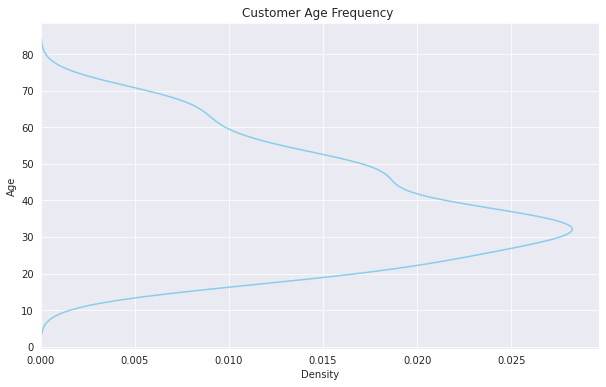

In [75]:
# CustomerID has no value so droping this column
df.drop(["CustomerID"], axis = 1, inplace=True)


#ploting graph between CUSTOMER AGE FREQUENCY and Age
plt.figure(figsize=(10,6))
plt.title("Customer Age Frequency ")
sns.axes_style("dark")
sns.kdeplot(y=data["Age"], color="skyblue")
plt.show()

# Takeaway:-
# 30-35 age group has the highest frequency

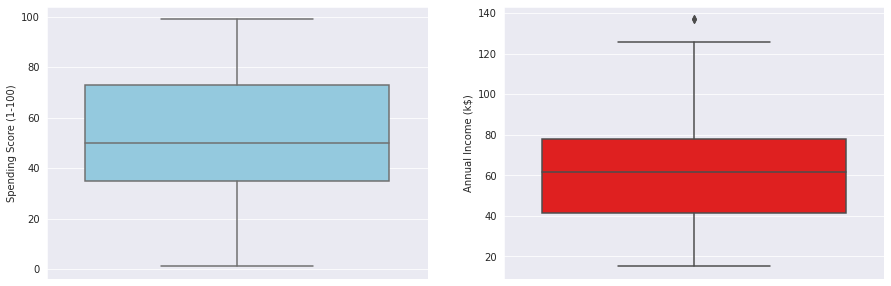

In [76]:
#box plot of spending score and annual income to better visualize the distribution range

#It gives idea about outliers

#Boxplot of of spending Score
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="skyblue")

#Boxplot of Annual income

plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"],color ="red")
plt.show()

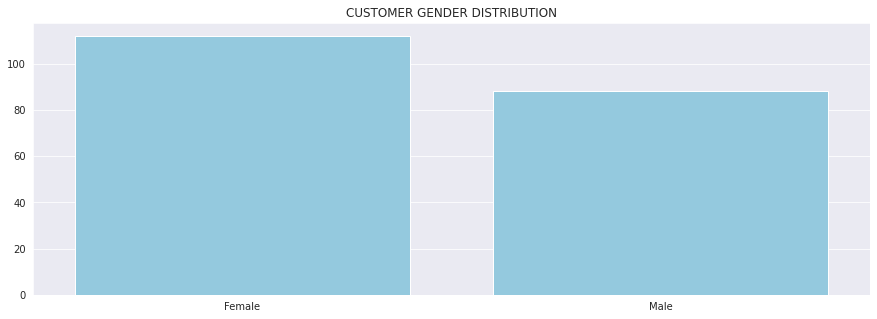

In [71]:
# check distribution of male and female population

genders = df.Gender.value_counts()  #gives the number of count

sns.set_style("darkgrid")

plt.figure(figsize=(15,5))    
plt.title("CUSTOMER GENDER DISTRIBUTION")
sns.barplot(x=genders.index, y=genders.values,color="skyblue")
plt.show()

# Customer is more likely to be a female than a male 

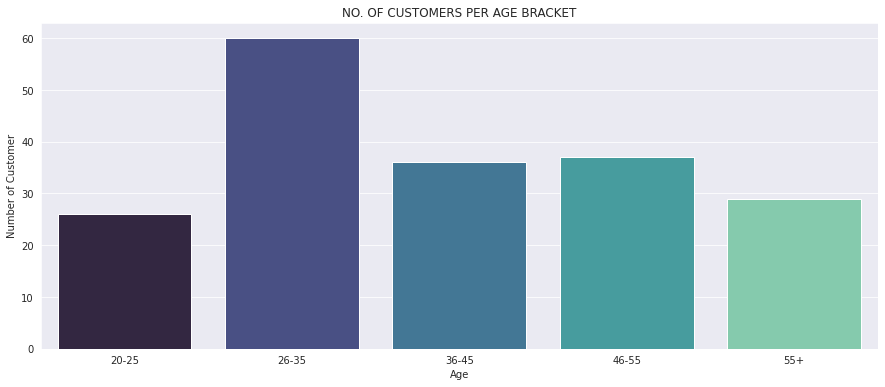

In [40]:
# check the distribution of number of customers in each age group
#Taking age between 18 to 25
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 20)]
#Taking age between 26 to 35
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
#Taking age between 36 to 45
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
#Taking age between 46 to 55
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
#Taking age greater than 56
age55above = df.Age[df.Age >= 56]

#label on x axis
x = ["20-25","26-35","36-45","46-55","55+"]
#label on y axis
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="mako")
plt.title("NO. OF CUSTOMERS PER AGE BRACKET")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

# Age group of the most likely customer
# 1.26–35 age group 
# 2.18-25 age group 
# 3.36-45 age group
# Teens and young adults are a good market for this product

# Visualizing the number of customers according to their spending scores ploting them accordingly

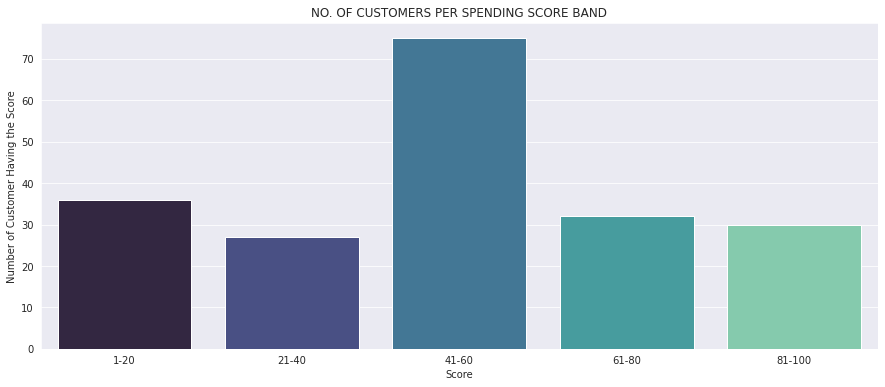

In [63]:
# visualizing the number of customers according to their spending scores
#ploting them accordingly

spending_score1_20 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 1) & (data["Spending Score (1-100)"] <= 20)]

spending_score21_40 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 21) & (data["Spending Score (1-100)"] <= 40)]

spending_score41_60 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 41) & (data["Spending Score (1-100)"] <= 60)]

spending_score61_80 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 61) & (data["Spending Score (1-100)"] <= 80)]

spending_score81_100 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 81) & (data["Spending Score (1-100)"] <= 100)]

#Values over X and Y axis 
spending_score_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
spending_score_y = [len(spending_score1_20.values), len(spending_score21_40.values), len(spending_score41_60.values), len(spending_score61_80.values), len(spending_score81_100.values)]

#ploting the data based on Score and NO. OF CUSTOMERS PER SPENDING SCORE 
plt.figure(figsize=(15,6))

#importing seaborn libraries to plot 
sns.barplot(x=spending_score_x, y=spending_score_y, palette="mako")
plt.title("NO. OF CUSTOMERS PER SPENDING SCORE BAND")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

# Majority of the customers have spending score in the range of 41-60

# Visualizing the number of customers according to their ANNUAL scores ploting them accordingly

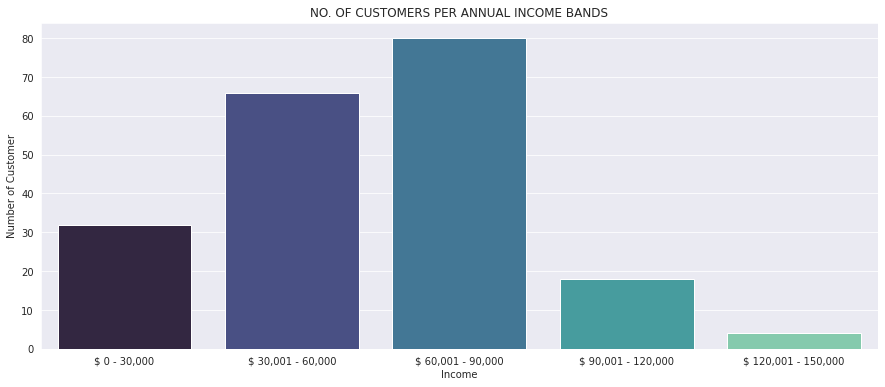

In [72]:
# visualize the number of customers according to their annual income

ai0_30 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 0) & (data["Annual Income (k$)"] <= 30)]
ai31_60 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 31) & (data["Annual Income (k$)"] <= 60)]
ai61_90 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 61) & (data["Annual Income (k$)"] <= 90)]
ai91_120 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 91) & (data["Annual Income (k$)"] <= 120)]
ai121_150 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 121) & (data["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="mako")
plt.title("NO. OF CUSTOMERS PER ANNUAL INCOME BANDS")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

# Takeaway:-
# Majority of the customers have annual income in the range 60000 and 90000

# Elbow method
- For finding the optimal number of clusters
- In the Elbow method, we are varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). 
- WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. 
- As the number of clusters increases, the WCSS value will start to decrease.value is largest when K = 1.

## Determining the number of Optimal Clusters Using The Elbow Method

Goal - maximize number of clusters and limiting case each data point becoming its own cluster centroid.

- Plot Within Cluster Sum Of Squares (WCSS) against number of clusters (K Value)
- WCSS measures sum of distances of observations from their cluster centroids
- Calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS first starts to diminish.

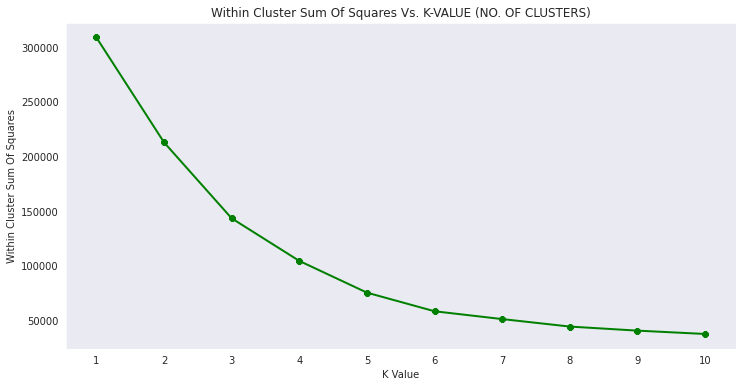

In [84]:
#Within Cluster Sum Of Squares wcss
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(data.iloc[:,1:])
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,6))  
plt.title("Within Cluster Sum Of Squares Vs. K-VALUE (NO. OF CLUSTERS)")
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="green", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Within Cluster Sum Of Squares")
plt.show()


# 3D plot to visualize the spending score of the customers with their annual income

- Optimal Clusters == 5


# K-Means Clustering Algorithm

- Let's say we have x1, x2, x3......... x(n) as our inputs, and we want to split this into K clusters.
- Step 1 : Choose K random points as cluster centers called centroids.

- Step 2 : Assign each x(i) to the closest cluster by implementing euclidean distance (i.e., calculating its distance to each centroid)
 
- Step 3 : Identify new centroids by taking the average of the assigned points.

- Step 4 : Keep repeating step 2 and step 3 until convergence is achieved

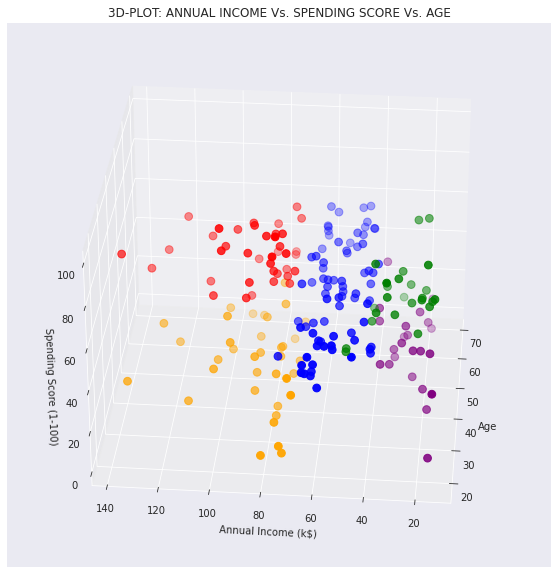

In [87]:
# 3D plot to visualize the spending score of the customers with their annual income

# Optimal Clusters == 5

km = KMeans(n_clusters=5)

#already droped Customer ID taking coloumn of AGE ANNUAL INCOME AND SPENDING SCORE using iloc
clusters = km.fit_predict(data.iloc[:,1:])

data["label"] = clusters
 
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.label == 0], data["Annual Income (k$)"][data.label == 0], data["Spending Score (1-100)"][data.label == 0], c='blue', s=60)
ax.scatter(data.Age[data.label == 1], data["Annual Income (k$)"][data.label == 1], data["Spending Score (1-100)"][data.label == 1], c='red', s=60)
ax.scatter(data.Age[data.label == 2], data["Annual Income (k$)"][data.label == 2], data["Spending Score (1-100)"][data.label == 2], c='green', s=60)
ax.scatter(data.Age[data.label == 3], data["Annual Income (k$)"][data.label == 3], data["Spending Score (1-100)"][data.label == 3], c='orange', s=60)
ax.scatter(data.Age[data.label == 4], data["Annual Income (k$)"][data.label == 4], data["Spending Score (1-100)"][data.label == 4], c='purple', s=60)
ax.view_init(30, 185)


plt.title("3D-PLOT: ANNUAL INCOME Vs. SPENDING SCORE Vs. AGE")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

# Advantages of Customer Segmentation
- Determine appropriate product pricing.

- Develop customized marketing campaigns.

- Design an optimal distribution strategy.

- Choose specific product features for deployment.

- Prioritize new product development efforts.

# Next Task
- Customer Segmentation Using Recency/Monetary Matrix¶ 

# The RFM model:

- Recency: When was the last time they purchased?
- Frequency: How often and for how long have they purchased?
- Monetary Value/Sales: How much have they purchased?